In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Sample sales data with time, categories, and metrics
np.random.seed(42)
date_rng = pd.date_range("2023-01-01", periods=90, freq="D")
data = {
    "Date": date_rng,
    "Product": np.random.choice(["Laptop", "Phone", "Tablet", "Accessories"], 90),
    "Region": np.random.choice(["North", "South", "East", "West"], 90),
    "Sales": np.random.randint(100, 5000, 90),
    "Profit": np.random.uniform(0.1, 0.3, 90)  # Profit margin ratio
}

sales = pd.DataFrame(data)
sales["Profit_Amount"] = sales["Sales"] * sales["Profit"]

In [3]:
""" Matplotlib: Customized Plots """

' Matplotlib: Customized Plots '

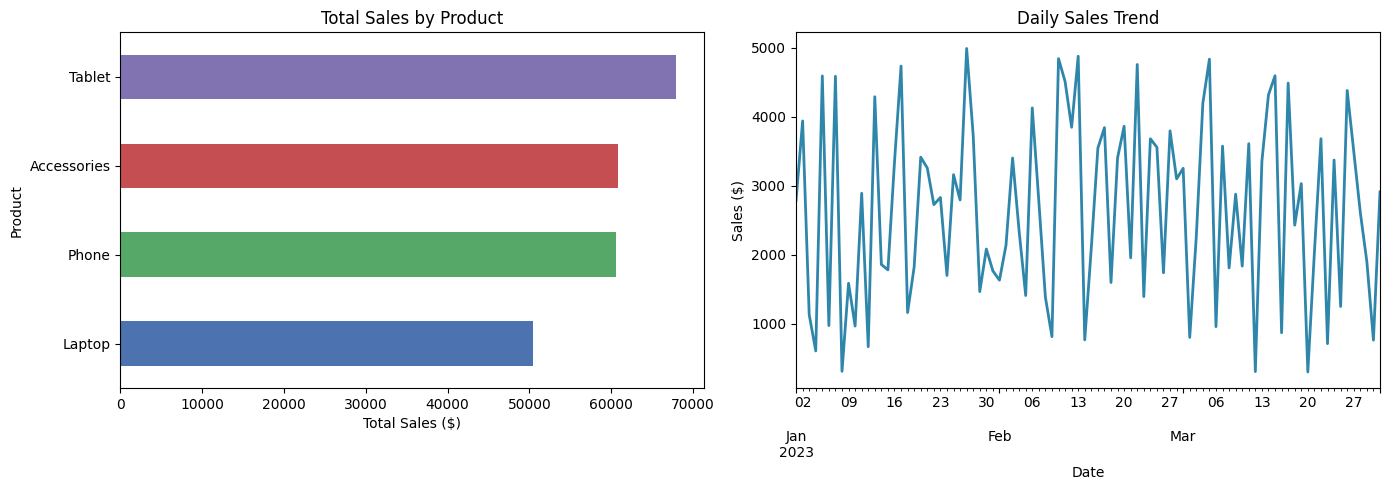

In [2]:
# Multi-Panel Dashboard

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Panel 1: Sales Distribution by Product
sales.groupby("Product")["Sales"].sum().sort_values().plot(
    kind="barh",
    ax=ax1,
    color=["#4C72B0", "#55A868", "#C44E52", "#8172B2"],
    title="Total Sales by Product"
)
ax1.set_xlabel("Total Sales ($)")

# Panel 2: Daily Sales Trend
sales.set_index("Date")["Sales"].plot(
    ax=ax2,
    lw=2,
    color="#2E86AB",
    title="Daily Sales Trend"
)
ax2.set_ylabel("Sales ($)")

plt.tight_layout()
plt.show()

In [ ]:
""" Seaborn: Stastical Visualizations """

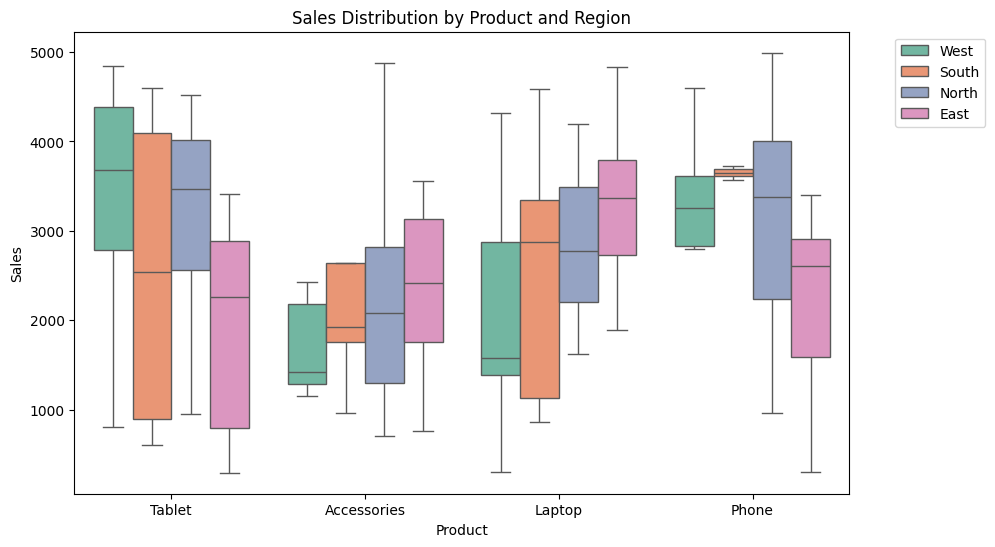

In [3]:
# Advanced Boxplot with Hue
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=sales,
    x="Product",
    y="Sales",
    hue="Region",
    palette="Set2",
    showfliers=False # Hide Outliers
)
plt.title("Sales Distribution by Product and Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

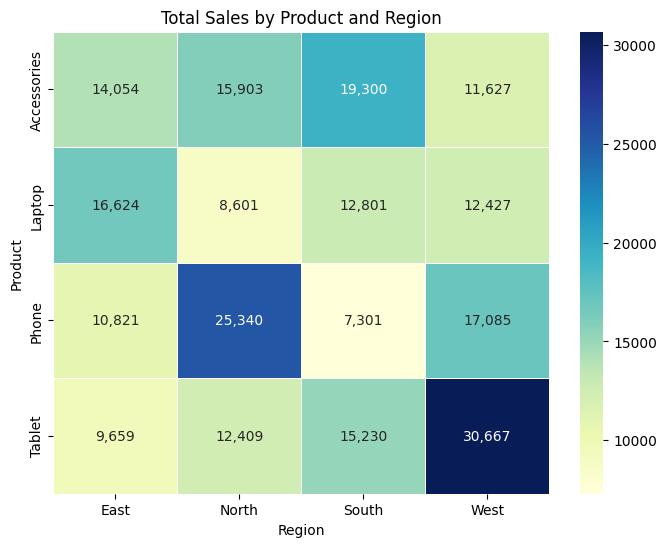

In [19]:
# Heatmap with Annotations

# Create pivot table
pivot = sales.pivot_table(
    index="Product",
    columns="Region",
    values="Sales",
    aggfunc="sum"
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot,
    annot=True,
    fmt=",.0f",
    cmap="YlGnBu",
    linewidths=.5
)
plt.title("Total Sales by Product and Region")
plt.show()

In [ ]:
""" Plotly: Interactive Visualizations """

In [4]:
# Interactive Scatter Plot
fig = px.scatter(
    sales,
    x="Sales",
    y="Profit_Amount",
    color="Product",
    size="Sales",
    hover_data=["Region", "Date"],
    title="Sales vs Profit (Interactive)"
)
fig.update_layout(hovermode="closest")
fig.show()

In [5]:
# Animated Time Series
fig = px.line(
    sales,
    x="Date",
    y="Sales",
    color="Product",
    line_group="Product",
    hover_name="Region",
    animation_frame="Product",  # Creates animation
    title="Animated Sales Trends"
)
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
""" Pandas Built-in Visualizations """

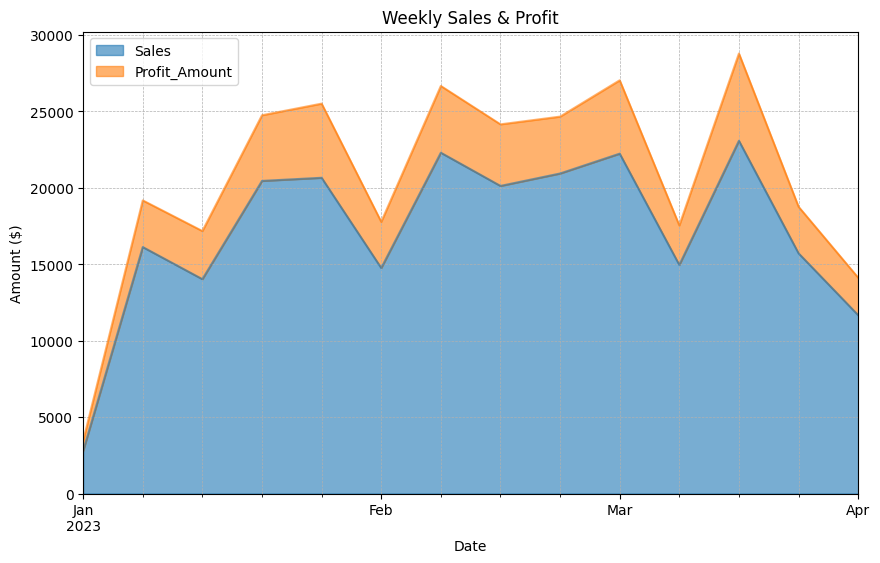

In [6]:
# Customized Area Plot

# Resample to weekly data
weekly = sales.set_index("Date").resample("W").agg({
    "Sales": "sum",
    "Profit_Amount": "sum"
})

# Plot with pandas
ax = weekly.plot.area(
    alpha=0.6,
    figsize=(10, 6),
    color=["#1f77b4", "#ff7f0e"],
    title="Weekly Sales & Profit"
)
ax.set_ylabel("Amount ($)")
ax.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [ ]:
""" Combining Visualization Techniques """

/Users/azhar/Documents/python learning/pandas_project/studysession/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/Users/azhar/Documents/python learning/pandas_project/studysession/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/Users/azhar/Documents/python learning/pandas_project/studysession/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/Users/azhar/Documents/python learning/pandas_project/studysession/lib/python3.13/

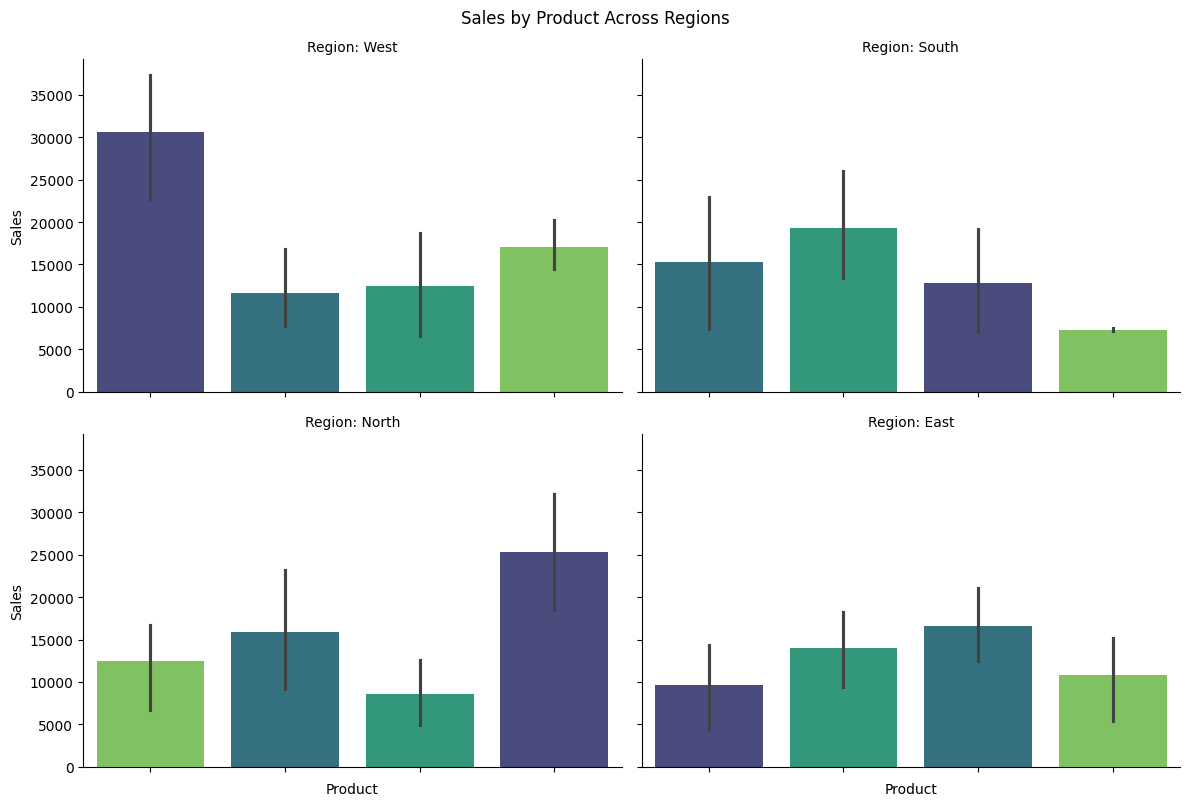

In [7]:
# Faceted Grid with Seaborn + Matplotlib
g = sns.FacetGrid(
    sales, 
    col="Region", 
    col_wrap=2, 
    height=4,
    aspect=1.5
)
g.map_dataframe(
    sns.barplot, 
    x="Product", 
    y="Sales", 
    palette="viridis",
    estimator=sum
)
g.set_titles("Region: {col_name}")
g.set_xticklabels(rotation=45)
plt.suptitle("Sales by Product Across Regions", y=1.02)
plt.show()